In [109]:
# get API key
import os
import json
import requests
from pprint import pprint
from config import api_key

#import csv 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns


#import csv file
csv_path = "data/gender_Jun16.csv"


In [110]:
df1 = pd.read_csv('./data/Cleaned_genderinequalityUN.csv')

df2 = pd.read_csv('./data/gender_Jun16.csv')

df3 = pd.read_csv('./data/worldbankpopulation.csv')

In [111]:
country1 = df1.Country

country2 = df2.COUNTRY.drop_duplicates()

country3 = df3['Country Name']

In [112]:
df = pd.concat([country1,country2,country3])
df.head(10)

0               Switzerland
1                    Norway
2                   Iceland
3    Hong Kong, China (SAR)
4                 Australia
5                   Denmark
6                    Sweden
7                   Ireland
8                   Germany
9               Netherlands
dtype: object

In [5]:
#df = df.to_frame()

In [6]:
##df.columns = ['country']

In [7]:
#df['country'] = df.country.str.strip().str.lower()

In [8]:
#df.country.drop_duplicates().sort_values().to_clipboard()

In [15]:
#standardized = pd.read_clipboard()


In [113]:
# read in CSV renamed_countries
renamed_countries = pd.read_csv('./data/renamed_countries.csv')

renamed_countries.head(10)

,country,standardized
0,afghanistan,afghanistan
1,africa eastern and southern,NaN
2,africa western and central,NaN
3,albania,albania
4,algeria,algeria
5,american samoa,NaN
6,andorra,andorra
7,angola,angola
8,antigua and barbuda,antigua and barbuda
9,arab world,arab world


In [16]:
#standardized['standardized'] = standardized.standardized.fillna(standardized.country)


,country,standardized
0,afghanistan,afghanistan
1,africa eastern and southern,africa eastern and southern
2,africa western and central,africa western and central
3,albania,albania
4,algeria,algeria
...,...,...
314,world,world
315,yemen,yemen
316,"yemen, rep.",yemen
317,zambia,zambia


In [7]:
#export CSV of standardized dataframe
#standardized.to_csv('data/standardized.csv', index=False)

In [8]:
#standardized.country.value_counts()

In [114]:
df1['Country'] = df1.Country.str.lower().str.strip()

#rename country column 
df1.rename(columns={'Country':'country'}, inplace=True)

In [115]:
df2['COUNTRY'] = df2.COUNTRY.str.lower().str.strip()

#rename country column
df2.rename(columns={'COUNTRY':'country'}, inplace=True)


In [116]:
df3['Country Name'] = df3['Country Name'].str.lower().str.strip()

#rename country column
df3.rename(columns={'Country Name':'country'}, inplace=True)

In [117]:
df.head(10)

0               Switzerland
1                    Norway
2                   Iceland
3    Hong Kong, China (SAR)
4                 Australia
5                   Denmark
6                    Sweden
7                   Ireland
8                   Germany
9               Netherlands
dtype: object

In [29]:
#df.columns = df.columns.str.lower().str.replace(' ','_') 

In [118]:
# left_merged = pd.merge(
# ...     climate_temp, precip_one_station, how="left", on=["STATION", "DATE"]
# ... )
# >>> left_merged.shape
# (127020, 48)

# df1.join(standardized, lsuffix="country", rsuffix="country")

# m = df1.merge(standardized,how='left',indicator='merge_country')

# m.merge_country.value_counts()


#country_join_df1 = pd.merge(df1, standardized, how="left", on=["country"],indicator=True)

country_join_df1 = pd.merge(df1, renamed_countries, how="left", on=["country"],indicator=True)




In [119]:
country_join_df2 = pd.merge(df2, renamed_countries, how="left", on=["country"],indicator=True)

In [120]:
country_join_df3 = pd.merge(df3, renamed_countries, how="left", on=["country"],indicator=True)

In [121]:
country_join_df1['standardized'].value_counts()

standardized
dominican republic              2
democratic republic of congo    2
switzerland                     1
india                           1
morocco                         1
                               ..
thailand                        1
albania                         1
bulgaria                        1
grenada                         1
south sudan                     1
Name: count, Length: 184, dtype: int64

In [122]:
country_join_df2.head(10)

,EVENT_ID_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,DISORDER_TYPE,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,INTER1,...,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TAGS,TIMESTAMP,standardized,_merge
0,XKX12,14-February-2018,2018,1,Demonstrations,Protests,Peaceful protest,Protesters (Kosovo),Women (Kosovo),6,...,21.172,1,Kallxo,National,"On 14 February 2018, 2018 in Pristina, Kosovo,...",0,NaN,1652375201,kosovo,both
1,XKX19,08-March-2018,2018,1,Demonstrations,Protests,Peaceful protest,Protesters (Kosovo),Women (Kosovo),6,...,21.172,1,Kosova Press,National,"On 8 March 2018, in Kosovo capital Pristina, w...",0,NaN,1652899424,kosovo,both
2,XKX35,20-April-2018,2018,2,Political violence,Violence against civilians,Attack,Unidentified Armed Group (Kosovo),Albanian Ethnic Group (Kosovo),3,...,20.865,1,Vecernje Novosti,International,"As reported on April 20, 2018, female journali...",0,NaN,1572403786,kosovo,both
3,XKX64,22-July-2018,2018,1,Demonstrations,Protests,Peaceful protest,Protesters (Kosovo),Women (Kosovo),6,...,21.026,1,Kosova Press,National,"On 22 July 2018, 2018 in Prizren, Kosovo, FEMa...",0,crowd size=no report,1652375197,kosovo,both
4,XKX67,09-August-2018,2018,1,Demonstrations,Protests,Peaceful protest,Protesters (Kosovo),Women (Kosovo),6,...,20.431,1,Kallxo,National,"On 9 August 2018, 2018 in Gjakova, Kosovo, cit...",0,NaN,1652375197,kosovo,both
5,XKX68,11-August-2018,2018,1,Demonstrations,Protests,Peaceful protest,Protesters (Kosovo),Women (Kosovo),6,...,20.431,1,Kallxo,National,"On 11 August 2018, 2018 in Gjakova, Kosovo, ci...",0,NaN,1652375197,kosovo,both
6,XKX70,11-August-2018,2018,1,Demonstrations,Protests,Peaceful protest,Protesters (Kosovo),Women (Kosovo),6,...,21.172,1,Kallxo,National,"On 11 August 2018, 2018 in Pristina, Kosovo, c...",0,NaN,1652375197,kosovo,both
7,XKX72,17-August-2018,2018,1,Demonstrations,Protests,Peaceful protest,Protesters (Kosovo),Women (Kosovo),6,...,21.155,1,Local Source; RTK,National-International,"On 17 August 2018, 2018 in Ferizaj, Kosovo act...",0,NaN,1652375197,kosovo,both
8,XKX74,27-August-2018,2018,1,Demonstrations,Protests,Peaceful protest,Protesters (Kosovo),Women (Kosovo),6,...,21.256,1,Kallxo,National,"On 27 August 2018, 2018 in Kacanik, Kosovo, ci...",0,NaN,1652375197,kosovo,both
9,XKX81,06-September-2018,2018,1,Demonstrations,Protests,Peaceful protest,Protesters (Kosovo),Women (Kosovo),6,...,21.463,1,Zeri,International,"On 6 September 2018, 2018 in Gjilan, Kosovo, c...",0,NaN,1652375196,kosovo,both


<AxesSubplot:ylabel='DISORDER_TYPE'>

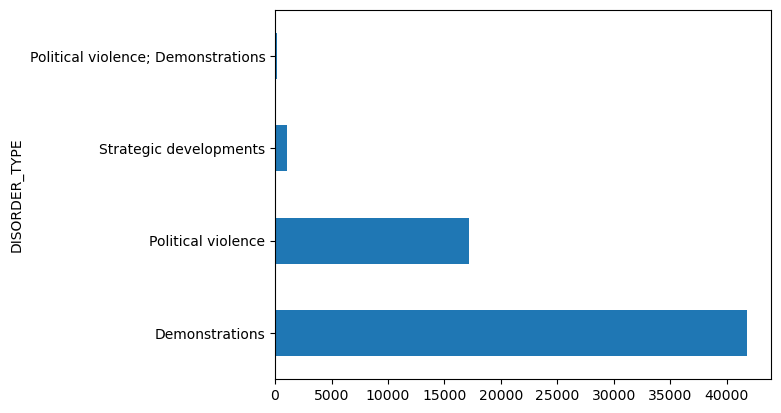

In [123]:
#plotting demonstrations data 

country_join_df2['DISORDER_TYPE'].value_counts().plot(kind = "barh")

In [124]:
# group by country to see the share of demonstrations that are politically violent 
demo_share_df = country_join_df2.groupby(['standardized', 'DISORDER_TYPE']).count()
demo_share_df.head(10)


EVENT_ID_CNTY  EVENT_DATE  \
standardized DISORDER_TYPE                                                   
afghanistan  Demonstrations                                243         243   
             Political violence                            219         219   
             Political violence; Demonstrations              4           4   
             Strategic developments                         38          38   
albania      Demonstrations                                 32          32   
             Political violence                              1           1   
algeria      Demonstrations                                 56          56   
             Political violence                             13          13   
             Political violence; Demonstrations              1           1   
andorra      Demonstrations                                  4           4   

                                                 YEAR  TIME_PRECISION  \
standardized DISORDER_TYPE                                              
afghanistan  Demonstrations                       243             243   
             Political violence                   219             219   
             Political violence; Demonstrations     4               4   
             Strategic developments                38              38   
albania      Demonstrations                        32              32   
             Political violence                     1               1   
algeria      Demonstrations                        56              56   
             Political violence                    13              13   
             Political violence; Demonstrations     1               1   
andorra      Demonstrations                         4               4   

                                                 EVENT_TYPE  SUB_EVENT_TYPE  \
standardized DISORDER_TYPE                                                    
afghanistan  Demonstrations                             243             243   
             Political violence                         219             219   
             Political violence; Demonstrations           4               4   
             Strategic developments                      38              38   
albania      Demonstrations                              32              32   
             Political violence                           1               1   
algeria      Demonstrations                              56              56   
             Political violence                          13              13   
             Political violence; Demonstrations           1               1   
andorra      Demonstrations                               4               4   

                                                 ACTOR1  ASSOC_ACTOR_1  \
standardized DISORDER_TYPE                                               
afghanistan  Demonstrations                         243            243   
             Political violence                     219              5   
             Political violence; Demonstrations       4              4   
             Strategic developments                  38              0   
albania      Demonstrations                          32             32   
             Political violence                       1              0   
algeria      Demonstrations                          56             56   
             Political violence                      13              0   
             Political violence; Demonstrations       1              1   
andorra      Demonstrations                           4              4   

                                                 INTER1  ACTOR2  ...  \
standardized DISORDER_TYPE                                       ...   
afghanistan  Demonstrations                         243      38  ...   
             Political violence                     219     219  ...   
             Political violence; Demonstrations       4       4  ...   
             Strategic developments  

In [125]:
# demo_share_df.plot(kind = 'barh')

# top_10 = ["india", "united states", "mexico", "turky", "iran", "brazil"]

demo_share_df.sort_values(by = 'EVENT_ID_CNTY', ascending=False)


# worldbank_df = worldbank_df.loc[worldbank_df["Country Name"].isin(countries),:]

,,EVENT_ID_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,INTER1,ACTOR2,...,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TAGS,TIMESTAMP,_merge
standardized,DISORDER_TYPE,,,,,,,,,,,,,,,,,,,,,
united states,Demonstrations,5624,5624,5624,5624,5624,5624,5624,5592,5624,629,...,5624,5624,5624,5624,5624,5624,5624,5624,5624,5624
india,Demonstrations,5413,5413,5413,5413,5413,5413,5413,5405,5413,453,...,5413,5413,5413,5413,5413,5413,5413,4131,5413,5413
mexico,Political violence,2739,2739,2739,2739,2739,2739,2739,61,2739,2739,...,2739,2739,2739,2739,2739,2739,2739,485,2739,2739
turkey,Demonstrations,2492,2492,2492,2492,2492,2492,2492,2488,2492,245,...,2492,2492,2492,2492,2492,2492,2492,2372,2492,2492
mexico,Demonstrations,2426,2426,2426,2426,2426,2426,2426,2420,2426,109,...,2426,2426,2426,2426,2426,2426,2426,2423,2426,2426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
solomon islands,Political violence,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
slovenia,Political violence,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
serbia,Strategic developments,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,0,1,1


In [126]:
country_join_df3.head(10)

,Series Name,Series Code,country,Country Code,1990 [YR1990],2000 [YR2000],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],standardized,_merge
0,"Population, total",SP.POP.TOTL,afghanistan,AFG,10694796,19542982,31541209,32716210,33753499,34636207,35643418,36686784,37769499,38972230,40099462,41128771,afghanistan,both
1,"Population, total",SP.POP.TOTL,albania,ALB,3286542,3089027,2895092,2889104,2880703,2876101,2873457,2866376,2854191,2837849,2811666,2775634,albania,both
2,"Population, total",SP.POP.TOTL,algeria,DZA,25518074,30774621,38000626,38760168,39543154,40339329,41136546,41927007,42705368,43451666,44177969,44903225,algeria,both
3,"Population, total",SP.POP.TOTL,american samoa,ASM,47818,58230,52995,52217,51368,50448,49463,48424,47321,46189,45035,44273,NaN,both
4,"Population, total",SP.POP.TOTL,andorra,AND,53569,66097,71367,71621,71746,72540,73837,75013,76343,77700,79034,79824,andorra,both
5,"Population, total",SP.POP.TOTL,angola,AGO,11828638,16394062,26147002,27128337,28127721,29154746,30208628,31273533,32353588,33428486,34503774,35588987,angola,both
6,"Population, total",SP.POP.TOTL,antigua and barbuda,ATG,63328,75055,88497,89236,89941,90564,91119,91626,92117,92664,93219,93763,antigua and barbuda,both
7,"Population, total",SP.POP.TOTL,argentina,ARG,32637657,37070774,42202935,42669500,43131966,43590368,44044811,44494502,44938712,45376763,45808747,46234830,argentina,both
8,"Population, total",SP.POP.TOTL,armenia,ARM,3556539,3168523,2901385,2889930,2878595,2865835,2851923,2836557,2820602,2805608,2790974,2780469,armenia,both
9,"Population, total",SP.POP.TOTL,aruba,ABW,65712,89101,102880,103594,104257,104874,105439,105962,106442,106585,106537,106445,aruba,both


In [127]:
#are demonstrations disproportionately politically violent in some countries based on population?

#create new data frame with country_join_df3 with columns standardized, 2021 [YR2021] AND country_join_df2 with columns standardized, DISORDER_TYPE
pop_demo_df = country_join_df3[['standardized', '2021 [YR2021]']]
pop_demo_df.head(10)
#now add country_join_df2 with columns standardized, DISORDER_TYPE to pop_demo_df
pop_demo_df = pd.merge(pop_demo_df, country_join_df2[['standardized', 'DISORDER_TYPE']], how="left", on=["standardized"],indicator=True)
pop_demo_df.head(10)




,standardized,2021 [YR2021],DISORDER_TYPE,_merge
0,afghanistan,40099462,Political violence,both
1,afghanistan,40099462,Political violence,both
2,afghanistan,40099462,Political violence,both
3,afghanistan,40099462,Political violence,both
4,afghanistan,40099462,Political violence,both
5,afghanistan,40099462,Political violence,both
6,afghanistan,40099462,Political violence,both
7,afghanistan,40099462,Strategic developments,both
8,afghanistan,40099462,Political violence,both
9,afghanistan,40099462,Demonstrations,both


In [128]:
pop_demo_df["2021 [YR2021]"].unique()

array(['40099462', '2811666', '44177969', '45035', '79034', '34503774',
       '93219', '45808747', '2790974', '106537', '25688079', '8955797',
       '10137750', '407906', '1463265', '169356251', '281200', '9302585',
       '11592952', '400031', '12996895', '63764', '777486', '12079472',
       '3270943', '2588423', '214326223', '31122', '445373', '6877743',
       '22100683', '12551213', '587925', '16589023', '27198628',
       '38226498', '68136', '5457154', '17179740', '172683', '19493184',
       '1412360000', '51516562', '821625', '95894118', '5835806',
       '5153957', '27478249', '3879000', '11256372', '152369', '1244188',
       '10505772', '5856733', '1105557', '72412', '11117873', '17797737',
       '109262178', '6314167', '1634466', '3620312', '1330932', '1192271',
       '120283026', '52889', '924610', '5541017', '67749632', '304032',
       '2341179', '2639916', '3708610', '83196078', '32833031', '32669',
       '10641221', '56653', '124610', '170534', '17109746', '13531

In [129]:
pop_demo_df.reset_index(inplace = True)

In [130]:
pop_demo_df.head(10)

,index,standardized,2021 [YR2021],DISORDER_TYPE,_merge
0,0,afghanistan,40099462,Political violence,both
1,1,afghanistan,40099462,Political violence,both
2,2,afghanistan,40099462,Political violence,both
3,3,afghanistan,40099462,Political violence,both
4,4,afghanistan,40099462,Political violence,both
5,5,afghanistan,40099462,Political violence,both
6,6,afghanistan,40099462,Political violence,both
7,7,afghanistan,40099462,Strategic developments,both
8,8,afghanistan,40099462,Political violence,both
9,9,afghanistan,40099462,Demonstrations,both


In [131]:
pop_demo_df.dtypes

index               int64
standardized       object
2021 [YR2021]      object
DISORDER_TYPE      object
_merge           category
dtype: object

In [132]:
#convert 2021 [YR2021] to numeric using .loc
pop_demo_df.loc[:,'2021 [YR2021]'] = pd.to_numeric(pop_demo_df['2021 [YR2021]'], errors = 'coerce').copy()

In [133]:
#cast 2021 [YR2021] as float
pop_demo_df['2021 [YR2021]'] = pop_demo_df['2021 [YR2021]'].astype(float, errors = 'ignore')

In [134]:
#drop null values in 2021 [YR2021]
pop_demo_df = pop_demo_df.dropna(subset=['2021 [YR2021]'])


In [135]:
pop_demo_df.dtypes

index               int64
standardized       object
2021 [YR2021]     float64
DISORDER_TYPE      object
_merge           category
dtype: object

In [136]:
#use groupby to get the sum of the population and the count of the demonstrations by country
pop_demo_df = pop_demo_df.groupby(['standardized', 'DISORDER_TYPE']).agg({'2021 [YR2021]': 'mean', 'DISORDER_TYPE': 'count'})

# pop_groupby_df = pop_demo_df.groupby(['standardized', 'DISORDER_TYPE']).sum()
pop_demo_df.head(10)


2021 [YR2021]  DISORDER_TYPE
standardized DISORDER_TYPE                                                   
afghanistan  Demonstrations                         40099462.0            243
             Political violence                     40099462.0            219
             Political violence; Demonstrations     40099462.0              4
             Strategic developments                 40099462.0             38
albania      Demonstrations                          2811666.0             32
             Political violence                      2811666.0              1
algeria      Demonstrations                         44177969.0             56
             Political violence                     44177969.0             13
             Political violence; Demonstrations     44177969.0              1
andorra      Demonstrations                            79034.0              4

In [137]:
#add new column to pop_demo_df that is the ratio of the population to the number of demonstrations
pop_demo_df['ratio'] = pop_demo_df['2021 [YR2021]']/pop_demo_df['DISORDER_TYPE']
pop_demo_df.head(10)

2021 [YR2021]  DISORDER_TYPE  \
standardized DISORDER_TYPE                                                      
afghanistan  Demonstrations                         40099462.0            243   
             Political violence                     40099462.0            219   
             Political violence; Demonstrations     40099462.0              4   
             Strategic developments                 40099462.0             38   
albania      Demonstrations                          2811666.0             32   
             Political violence                      2811666.0              1   
algeria      Demonstrations                         44177969.0             56   
             Political violence                     44177969.0             13   
             Political violence; Demonstrations     44177969.0              1   
andorra      Demonstrations                            79034.0              4   

                                                        ratio  
standardized DISORDER_TYPE                                     
afghanistan  Demonstrations                      1.650184e+05  
             Political violence                  1.831026e+05  
             Political violence; Demonstrations  1.002487e+07  
             Strategic developments              1.055249e+06  
albania      Demonstrations                      8.786456e+04  
             Political violence                  2.811666e+06  
algeria      Demonstrations                      7.888923e+05  
             Political violence                  3.398305e+06  
             Political violence; Demonstrations  4.417797e+07  
andorra      Demonstrations                      1.975850e+04

In [138]:
pop_demo_df.sort_values(by = 'ratio', ascending=False)

2021 [YR2021]  DISORDER_TYPE  \
standardized DISORDER_TYPE                                                      
pakistan     Political violence; Demonstrations   2.314021e+08              1   
brazil       Political violence; Demonstrations   2.143262e+08              1   
india        Strategic developments               1.407564e+09              7   
             Political violence; Demonstrations   1.407564e+09             10   
china        Strategic developments               1.412360e+09             14   
...                                                        ...            ...   
saint martin Demonstrations                       3.739700e+04              2   
             Political violence                   3.739700e+04              2   
sweden       Demonstrations                       1.041581e+07            587   
cyprus       Demonstrations                       1.244188e+06             75   
belize       Political violence                   4.000310e+05             32   

                                                        ratio  
standardized DISORDER_TYPE                                     
pakistan     Political violence; Demonstrations  2.314021e+08  
brazil       Political violence; Demonstrations  2.143262e+08  
india        Strategic developments              2.010805e+08  
             Political violence; Demonstrations  1.407564e+08  
china        Strategic developments              1.008829e+08  
...                                                       ...  
saint martin Demonstrations                      1.869850e+04  
             Political violence                  1.869850e+04  
sweden       Demonstrations                      1.774414e+04  
cyprus       Demonstrations                      1.658917e+04  
belize       Political violence                  1.250097e+04  

[426 rows x 3 columns]

<AxesSubplot:ylabel='standardized,DISORDER_TYPE'>

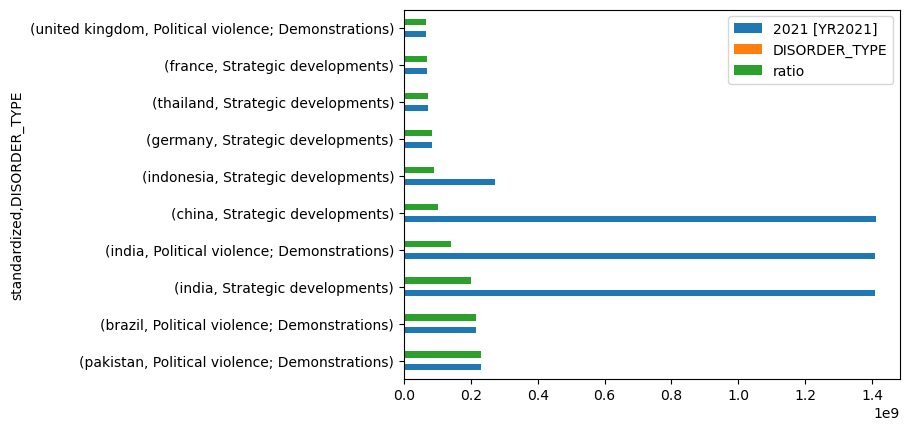

In [140]:
#visualizing the ratio of population to demonstrations by top 10 country
pop_demo_df.sort_values(by = 'ratio', ascending=False).head(10).plot(kind = 'barh')

In [ ]:
#freedom house data to show how poliitically free the countries above are



In [ ]:
# use wb_income_data to show economic equality of above countries

In [ ]:
#pull out event blurb for each country shown above 
#look into creative commons license images for each country shown above

In [ ]:
#work toward medium article and a google collab notebook that would be linked in the article

In [ ]:
#Geopandas to show where the demonstrations are happening in the world

#go into excel and do country codes to set up data to be mapped
#https://geopandas.org/en/stable/docs/user_guide/interactive_mapping.html

In [142]:
#visualizing the ratio of population to demonstrations by country in a chloropleth map
import plotly.express as px
#visualizing the ratio of population to demonstrations by country in a chloropleth map
fig = px.choropleth(pop_demo_df, locations=pop_demo_df.index.get_level_values(0), color=pop_demo_df['ratio'],
                    color_continuous_scale="Viridis",
                    hover_name=pop_demo_df.index.get_level_values(0), # column to add to hover information
                    hover_data=[pop_demo_df.index.get_level_values(1)],
                    title = 'Ratio of Population to Demonstrations by Country')
fig.show()


In [ ]:
#m = df1.merge(standardized,how='left',indicator='merge_country')

m = df1.merge(standardized,how='left',indicator=True)

# m.merge_country.value_counts()

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [ ]:
#get data
df = pd.read_csv(csv_path)
df

,EVENT_ID_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,DISORDER_TYPE,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,INTER1,...,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TAGS,TIMESTAMP
0,XKX12,14-February-2018,2018,1,Demonstrations,Protests,Peaceful protest,Protesters (Kosovo),Women (Kosovo),6,...,Pristina,42.667,21.172,1,Kallxo,National,"On 14 February 2018, 2018 in Pristina, Kosovo,...",0,NaN,1652375201
1,XKX19,08-March-2018,2018,1,Demonstrations,Protests,Peaceful protest,Protesters (Kosovo),Women (Kosovo),6,...,Pristina,42.667,21.172,1,Kosova Press,National,"On 8 March 2018, in Kosovo capital Pristina, w...",0,NaN,1652899424
2,XKX35,20-April-2018,2018,2,Political violence,Violence against civilians,Attack,Unidentified Armed Group (Kosovo),Albanian Ethnic Group (Kosovo),3,...,North Mitrovica,42.895,20.865,1,Vecernje Novosti,International,"As reported on April 20, 2018, female journali...",0,NaN,1572403786
3,XKX64,22-July-2018,2018,1,Demonstrations,Protests,Peaceful protest,Protesters (Kosovo),Women (Kosovo),6,...,Shterpca,42.241,21.026,1,Kosova Press,National,"On 22 July 2018, 2018 in Prizren, Kosovo, FEMa...",0,crowd size=no report,1652375197
4,XKX67,09-August-2018,2018,1,Demonstrations,Protests,Peaceful protest,Protesters (Kosovo),Women (Kosovo),6,...,Gjakova,42.380,20.431,1,Kallxo,National,"On 9 August 2018, 2018 in Gjakova, Kosovo, cit...",0,NaN,1652375197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60229,ZAM1459,21-January-2022,2022,1,Political violence,Riots,Mob violence,Rioters (Zambia),UPND Youth League: United Party for National D...,5,...,Kasama,-10.217,31.217,1,Daily Nation (Zambia); Lusaka Times; Zambia Re...,National,"On 21 January 2022, five suspected UPND youths...",0,crowd size=5; women targeted: government offic...,1683058339
60230,ZAM1482,25-February-2022,2022,1,Political violence,Riots,Mob violence,Rioters (Zambia),Students (Zambia),5,...,Ndola,-12.967,28.633,1,Mwebantu; Zambia Reports,National,"On 25 February 2022, a group of boys (assumed ...",0,crowd size=no report; women targeted: girls,1646691987
60231,ZAM1499,11-April-2022,2022,1,Demonstrations,Riots,Violent demonstration,Rioters (Zambia),Women (Zambia); Students (Zambia),5,...,Mporokoso,-9.371,30.122,1,Lusaka Times,National,"On 11 April 2022, girls from Lunte Girls Secon...",0,crowd size=no report,1663032950
60232,ZAM1522,01-September-2022,2022,1,Political violence,Riots,Mob violence,Rioters (Zambia),Vigilante Group (Zambia),5,...,Chama,-11.213,33.152,1,Zambia Reports,National,"On 1 September 2022, two men killed a woman ov...",1,crowd size=2; women targeted: accused of witch...,1663026147


In [68]:
#groupby demonstration_typee
disorder_type = df.groupby("DISORDER_TYPE")


KeyError: 'DISORDER_TYPE'

In [ ]:
#get count of disorder_types 
disorder_type_count = disorder_type["DISORDER_TYPE"].count()
disorder_type_count

DISORDER_TYPE
Demonstrations                        41812
Political violence                    17170
Political violence; Demonstrations      181
Strategic developments                 1071
Name: DISORDER_TYPE, dtype: int64

In [ ]:
disorder_type["COUNTRY"].value_counts()

DISORDER_TYPE           COUNTRY      
Demonstrations          United States    5624
                        India            5413
                        Turkey           2492
                        Mexico           2426
                        South Korea      1951
                                         ... 
Strategic developments  Thailand            1
                        Turkmenistan        1
                        Uganda              1
                        Uzbekistan          1
                        Zimbabwe            1
Name: COUNTRY, Length: 450, dtype: int64

In [ ]:
countryDf = pd.crosstab(df["COUNTRY"], df["DISORDER_TYPE"], margins=True)
countryDf


DISORDER_TYPE,Demonstrations,Political violence,Political violence; Demonstrations,Strategic developments,All
COUNTRY,,,,,
Afghanistan,243,219,4,38,504
Albania,32,1,0,0,33
Algeria,56,13,1,0,70
Andorra,4,0,0,0,4
Angola,25,26,0,0,51
...,...,...,...,...,...
Yemen,316,276,4,17,613
Zambia,4,35,0,0,39
Zimbabwe,103,181,20,1,305


In [ ]:
# get maximum value of countries with disorder types
maxDisorder = countryDf.sort_values(by="All", ascending=False).head(10)
maxDisorder
#get populations of countries to seee if any countries have a disporortionate amount of demonstrations 

DISORDER_TYPE,Demonstrations,Political violence,Political violence; Demonstrations,Strategic developments,All
COUNTRY,,,,,
All,41812,17170,181,1071,60234
India,5413,817,10,7,6247
United States,5624,86,6,31,5747
Mexico,2426,2739,2,6,5173
Turkey,2492,38,0,5,2535
Iran,1909,23,43,179,2154
Brazil,669,1327,1,4,2001
South Korea,1951,1,0,0,1952
Poland,1730,0,0,0,1730


In [ ]:
# get countries of disoder_type
disorder_type_country = disorder_type["COUNTRY"].unique()
disorder_type_country

DISORDER_TYPE
Demonstrations                        [Kosovo, Afghanistan, Albania, Algeria, Andorr...
Political violence                    [Kosovo, Afghanistan, Albania, Algeria, Angola...
Political violence; Demonstrations    [Afghanistan, Algeria, Argentina, Bangladesh, ...
Strategic developments                [Kosovo, Afghanistan, Argentina, Bahrain, Bang...
Name: COUNTRY, dtype: object

In [ ]:
#get number of countries disorder_type
disorder_type_country_count = disorder_type_country.str.len()
disorder_type_country_count

DISORDER_TYPE
Demonstrations                        184
Political violence                    150
Political violence; Demonstrations     40
Strategic developments                 76
Name: COUNTRY, dtype: int64

In [ ]:
#plotly bar chart



# disorder_type.hist(column="YEAR", bins=10)


In [ ]:
#Now let's import the data from worldbankpopulation.csv
worldbankdata = "data/worldbankpopulation.csv"

In [ ]:
#let's make the data into a dataframe
worldbank_df = pd.read_csv(worldbankdata)
worldbank_df.head()

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,"Population, total",SP.POP.TOTL,Afghanistan,AFG,10694796,19542982,31541209,32716210,33753499,34636207,35643418,36686784,37769499,38972230,40099462,41128771
1,"Population, total",SP.POP.TOTL,Albania,ALB,3286542,3089027,2895092,2889104,2880703,2876101,2873457,2866376,2854191,2837849,2811666,2775634
2,"Population, total",SP.POP.TOTL,Algeria,DZA,25518074,30774621,38000626,38760168,39543154,40339329,41136546,41927007,42705368,43451666,44177969,44903225
3,"Population, total",SP.POP.TOTL,American Samoa,ASM,47818,58230,52995,52217,51368,50448,49463,48424,47321,46189,45035,44273
4,"Population, total",SP.POP.TOTL,Andorra,AND,53569,66097,71367,71621,71746,72540,73837,75013,76343,77700,79034,79824


In [ ]:
#let's create a dataframe with populations of Country Name India, United States, Mexico, Turkey, Iran and Brazil
countries = ["India", "United States", "Mexico", "Turkiye", "Iran, Islamic Rep.", "Brazil"]
worldbank_df = worldbank_df.loc[worldbank_df["Country Name"].isin(countries),:]
#duplicated rows (look into documentation)
worldbank_df.head(10)
# countries

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
26,"Population, total",SP.POP.TOTL,Brazil,BRA,150706446,175873720,201721767,203459650,205188205,206859578,208504960,210166592,211782878,213196304,214326223,215313498
89,"Population, total",SP.POP.TOTL,India,IND,870452165,1059633675,1291132063,1307246509,1322866505,1338636340,1354195680,1369003306,1383112050,1396387127,1407563842,1417173173
91,"Population, total",SP.POP.TOTL,"Iran, Islamic Rep.",IRN,55793629,65544383,78458928,79961672,81790841,83306231,84505076,85617562,86564202,87290193,87923432,88550570
127,"Population, total",SP.POP.TOTL,Mexico,MEX,81720428,97873442,117290686,118755887,120149897,121519221,122839258,124013861,125085311,125998302,126705138,127504125
198,"Population, total",SP.POP.TOTL,Turkiye,TUR,54324142,64113547,76576117,78112073,79646178,81019394,82089826,82809304,83481684,84135428,84775404,85341241
206,"Population, total",SP.POP.TOTL,United States,USA,249623000,282162411,316059947,318386329,320738994,323071755,325122128,326838199,328329953,331511512,332031554,333287557


In [ ]:
# worldbank_df = worldbank_df.loc([worldbank_df["Country Name"] == "Mexico"])
# worldbank_df

#let's create a dataframe with population of Country Name India
india_df = worldbank_df[worldbank_df["Country Name"].isin(countries)]
india_df

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
26,"Population, total",SP.POP.TOTL,Brazil,BRA,150706446,175873720,201721767,203459650,205188205,206859578,208504960,210166592,211782878,213196304,214326223,215313498
89,"Population, total",SP.POP.TOTL,India,IND,870452165,1059633675,1291132063,1307246509,1322866505,1338636340,1354195680,1369003306,1383112050,1396387127,1407563842,1417173173
91,"Population, total",SP.POP.TOTL,"Iran, Islamic Rep.",IRN,55793629,65544383,78458928,79961672,81790841,83306231,84505076,85617562,86564202,87290193,87923432,88550570
127,"Population, total",SP.POP.TOTL,Mexico,MEX,81720428,97873442,117290686,118755887,120149897,121519221,122839258,124013861,125085311,125998302,126705138,127504125
198,"Population, total",SP.POP.TOTL,Turkiye,TUR,54324142,64113547,76576117,78112073,79646178,81019394,82089826,82809304,83481684,84135428,84775404,85341241
206,"Population, total",SP.POP.TOTL,United States,USA,249623000,282162411,316059947,318386329,320738994,323071755,325122128,326838199,328329953,331511512,332031554,333287557


In [ ]:
maxDisorder

DISORDER_TYPE,Demonstrations,Political violence,Political violence; Demonstrations,Strategic developments,All
COUNTRY,,,,,
All,41812,17170,181,1071,60234
India,5413,817,10,7,6247
United States,5624,86,6,31,5747
Mexico,2426,2739,2,6,5173
Turkey,2492,38,0,5,2535
Iran,1909,23,43,179,2154
Brazil,669,1327,1,4,2001
South Korea,1951,1,0,0,1952
Poland,1730,0,0,0,1730


In [ ]:
#create a dataframe from Cleaned_genderinequality.csv
genderinequalitydata = "data/Cleaned_genderinequalityUN.csv"
#let's make the data into a dataframe
gender_df = pd.read_csv(genderinequalitydata)
gender_df



,HDI rank,Country,Value - 2021,Rank - 2021,"Maternal mortality ratio (deaths per 100,000 live births) - 2017","Adolescent birth rate (births per 1,000 women ages 15–19) - 2021",Share of seats in parliament (% held by women) - 2021,Population with at least some secondary education (% ages 25 and older) - Female (2021),Population with at least some secondary education (% ages 25 and older) - Male (2021),Labour force participation rate (% ages 15 and older) - Female - 2021,Labour force participation rate (% ages 15 and older) - Male - 2021
0,1.0,Switzerland,0.018,3,5,2.2,39.8,96.9,97.5,61.7,72.7
1,2.0,Norway,0.016,2,2,2.3,45,99.1,99.3,60.3,72
2,3.0,Iceland,0.043,8,4,5.4,47.6,99.8,99.7,61.7,70.5
3,4.0,"Hong Kong, China (SAR)",..,..,..,1.6,..,77.1,83.4,53.5,65.8
4,5.0,Australia,0.073,19,6,8.1,37.9,94.6,94.4,61.1,70.5
...,...,...,...,...,...,...,...,...,...,...,...
189,187.0,Burundi,0.505,127,548,53.6,38.9,7.8,13,79,77.4
190,188.0,Central African Republic,0.672,166,829,160.5,12.9,13.9,31.6,63.3,79.5
191,189.0,Niger,0.611,153,509,170.5,25.9,9.2,15.2,61.7,84.3
192,190.0,Chad,0.652,165,"1,140",138.3,32.3,7.7,24.4,46.9,69.9


In [ ]:
gender_df["Country"].unique()

array(['Switzerland', 'Norway', 'Iceland', 'Hong Kong, China (SAR)',
       'Australia', 'Denmark', 'Sweden', 'Ireland', 'Germany',
       'Netherlands', 'Finland', 'Singapore', 'Belgium', 'New Zealand',
       'Canada', 'Liechtenstein', 'Luxembourg', 'United Kingdom', 'Japan',
       'Korea (Republic of)', 'United States', 'Israel', 'Malta',
       'Slovenia', 'Austria', 'United Arab Emirates', 'Spain', 'France',
       'Cyprus', 'Italy', 'Estonia', 'Czechia', 'Greece', 'Poland',
       'Bahrain', 'Lithuania', 'Saudi Arabia', 'Portugal', 'Latvia',
       'Andorra', 'Croatia', 'Chile', 'Qatar', 'San Marino', 'Slovakia',
       'Hungary', 'Argentina', 'Türkiye', 'Montenegro', 'Kuwait',
       'Brunei Darussalam', 'Russian Federation', 'Romania', 'Oman',
       'Bahamas', 'Kazakhstan', 'Trinidad and Tobago', 'Costa Rica',
       'Uruguay', 'Belarus', 'Panama', 'Malaysia', 'Georgia', 'Mauritius',
       'Serbia', 'Thailand', 'HIGH HUMAN DEVELOPMENT', 'Albania',
       'Bulgaria', 'Grenada

In [ ]:
#number of demonstrations vs. inequality (do each of UN columns to test assumptions)
#number of demonstrations vs. political freedom (do Freedom house PR rating to test assumptions)
#group by number of demonstrations into buckets. Do countries in the same bucket have similiar factors?
#do bins of countries by number of demonstrations to see if any countries groupeed together have similiar factors and are suprising to see
#do bins by regions and see any regional outliers?

#ML
#which column is most predictive? (do linear regression using ML)
#show factors on that cause areas of world to be at for gender inequality

In [ ]:
disorderIndex_df = maxDisorder.reset_index()
disorderIndex_df

DISORDER_TYPE,COUNTRY,Demonstrations,Political violence,Political violence; Demonstrations,Strategic developments,All
0,All,41812,17170,181,1071,60234
1,India,5413,817,10,7,6247
2,United States,5624,86,6,31,5747
3,Mexico,2426,2739,2,6,5173
4,Turkey,2492,38,0,5,2535
5,Iran,1909,23,43,179,2154
6,Brazil,669,1327,1,4,2001
7,South Korea,1951,1,0,0,1952
8,Poland,1730,0,0,0,1730
9,Pakistan,1391,194,1,4,1590


In [ ]:
gender_df.loc[gender_df["Country"].str.contains("Iran")]

,HDI rank,Country,Value - 2021,Rank - 2021,"Maternal mortality ratio (deaths per 100,000 live births) - 2017","Adolescent birth rate (births per 1,000 women ages 15–19) - 2021",Share of seats in parliament (% held by women) - 2021,Population with at least some secondary education (% ages 25 and older) - Female (2021),Population with at least some secondary education (% ages 25 and older) - Male (2021),Labour force participation rate (% ages 15 and older) - Female - 2021,Labour force participation rate (% ages 15 and older) - Male - 2021,Country Translate
76,76.0,Iran (Islamic Republic of),0.459,115,16,30.2,5.6,71.6,76,14.4,68.1,Iran (Islamic Republic of)


In [ ]:
translate = {"Iran (Islamic Republic of)": "Iran", "Türkiye": "Turkey", "Korea (Republic of)": "South Korea"}
disorderIndex_df.head(10)
gender_df

#join maxDisorder and gender_df by country

# countryTop_df

gender_df["Country Translate"] = gender_df["Country"].replace(translate)

countryTop_df = disorderIndex_df.merge(gender_df, left_on="COUNTRY", right_on="Country Translate", how="left")
countryTop_df.loc[countryTop_df["Country"].isnull() == 1, ['COUNTRY', 'Country']]



,COUNTRY,Country
0,All,NaN


In [ ]:
countryTop_df.columns

Index(['Demonstrations', 'Political violence',
       'Political violence; Demonstrations', 'Strategic developments', 'All',
       'HDI rank', 'Country', 'Value - 2021', 'Rank - 2021',
       'Maternal mortality ratio (deaths per 100,000 live births) - 2017',
       'Adolescent birth rate (births per 1,000 women ages 15–19) - 2021',
       'Share of seats in parliament (% held by women) - 2021',
       'Population with at least some secondary education (% ages 25 and older) - Female (2021)',
       'Population with at least some secondary education (% ages 25 and older) - Male (2021)',
       'Labour force participation rate (% ages 15 and older) - Female - 2021',
       'Labour force participation rate (% ages 15 and older) - Male - 2021'],
      dtype='object')

In [ ]:
#scatter plot with top 10 countries with most demonstrations (numbers on x axis) and inequality ranking
#maxDisorder.head(10)
#gender_df

#scatter plot by demonstration number and inequality ranking by country
sns.scatterplot(data=tips, x="total_bill", y="tip")

